# Transfer Learning con Hugging Face

## Introducción al Hub de Huggin Face

### Transfer Learning

El Transfer Learning (Aprendizaje por Transferencia) es una técnica utilizada para entrenar un modelo para una tarea específica y luego utilizar dicho modelo y todo su conocimiento adquirido para desarrollar una tarea posterior similar a la original; esto nos permite utilizar modelos previamente entrenados por compañías como Meta, Google y más para aplicarlos en tareas específicas. 

Por lo general, en un enfoque de aprendizaje supervisado lo que se hace es entrenar un modelo desde cero y esperar que funcione mientras el entorno se mantenga igual; cuando el entorno cambia, tenemos pocos datos en dichos cambios, entonces el modelo original no es tan bueno bajo estas condiciones y es aquí cuando utlizamos el Transfer Learning.

La idea detrás del Transfer Learning es utilizar modelos ya entrenados para tareas diferentes: los nuevos modelos aprenden de los errores de los modelos originales.

**Por qué usar Transfer Learning**
- Reutilizar el poder computacional usado para entrenar modelos gigantes de NLP, Computer Visión, entre otros, por grandes compañías.
- Menos costo para el medio ambiente.
- Siempre van a faltar datos; los datos son como el oro y, en consecuencia, siempre va a haber escasez de ellos. No obstante, utilizando transfer learning con menos datos podríamos obtener de igual forma buenos resultados.
- Un modelo al que se le aplica Transfer Learning a la larga será mejor que un modelo entrenado desde cero.

### Machine Learning Abierto

Ninguna empresa podrá por sí misma "resolver la IA" y es por ello que es necesario colaborar y compatir; se necesita una gran comunidad.

El Hub de Hugging Face es el punto central de la comunidad de machine learning para conseguir todo lo relacionado con esta área; hay modelos, datasets y spaces (demos).

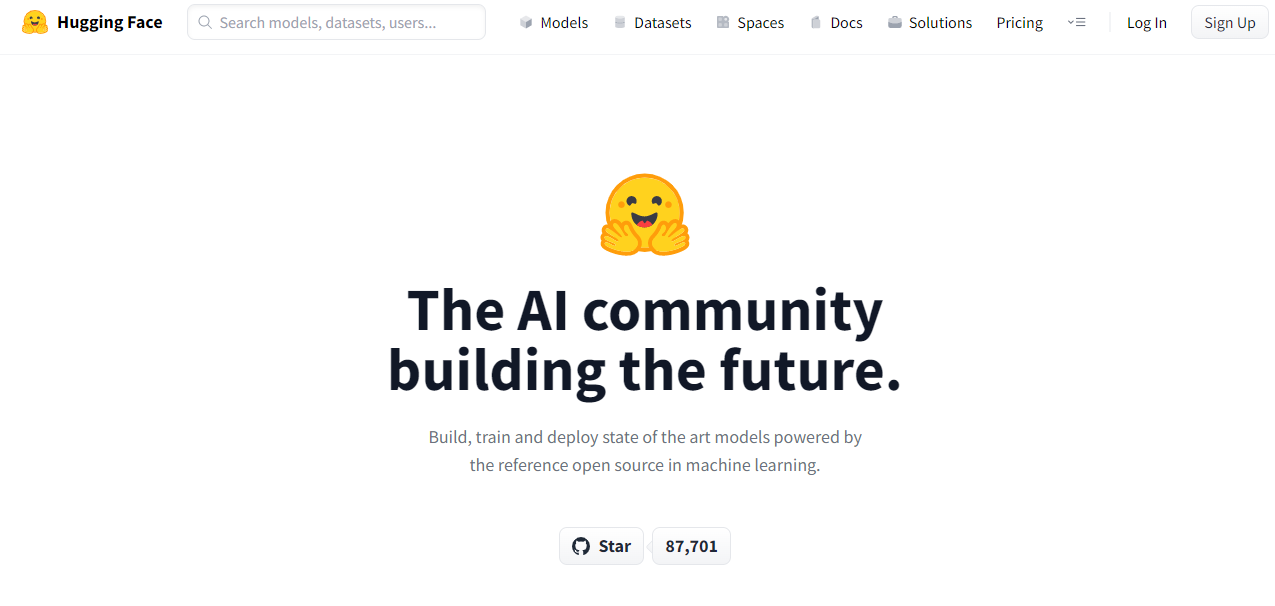

- Repos-ID: cada modelo dentro de la plataforma es un repositorio Git, haciendo que la interfaz sea muy parecida a plataformas como Github o GitLab.
- Model Card es la tarjeta del modelo. Contiene la información que describe cómo fue entrenado el modelo, quién lo entreno, de qué manera fue llevado a cabo.
- Hosted inference API permite usar el modelo directamente en el navegador sin tener que descargarlo para probar su poder.
- Spaces Using: espacios usados en el modelo.
- Use in Transformers nos permite utilizar el modelo. 

Las tasks son tareas específicas para las cuales se crea un modelo.

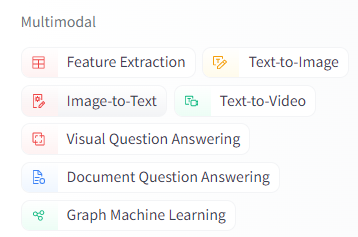
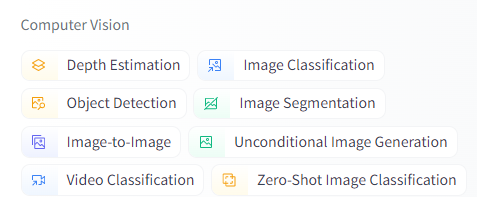
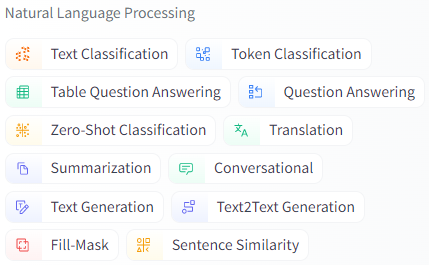
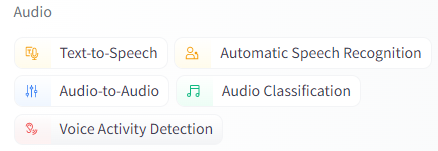
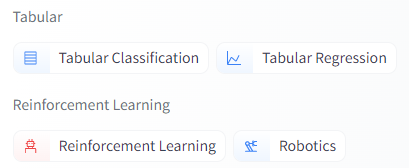

## Primeros pasos con Transfer Learning y Transformers

### Primeros modelos pre-entrenados usando Pipeline

Las pipelines son objetos que abstraen la mayoría de las complejidades de la biblioteca de Hugging Face para ofrecer una forma simple de utilizar modelos pre-entrenados en distintas tareas.

#### Instalación

In [19]:
%pip install numpy wheel pandas matplotlib timm torch torchvision torchaudio tensorflow flax transformers 

     ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
     -- ---------------------------------- 41.0/549.1 kB 960.0 kB/s eta 0:00:01
     ------------ ------------------------- 174.1/549.1 kB 2.1 MB/s eta 0:00:01
     ----------------------- -------------- 337.9/549.1 kB 2.6 MB/s eta 0:00:01
     -------------------------------------  542.7/549.1 kB 3.1 MB/s eta 0:00:01
     -------------------------------------- 549.1/549.1 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install "jax[cpu]===0.3.25" -f https://whls.blob.core.windows.net/unstable/index.html --use-deprecated legacy-resolver

Looking in links: https://whls.blob.core.windows.net/unstable/index.html
Note: you may need to restart the kernel to use updated packages.


#### Clasificación de Imágenes

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io
from transformers import pipeline

Utilizamos *pipeline* para cargar un modelo pre-entrenado para clasificación de imágenes.

In [2]:
# Cargamos un modelo para clasificación de imagen. Como no especificamos un modelo entonces se selecciona automáticamente
imgClassification = pipeline(task = "image-classification")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


Cargamos la imagen para que el modelo clasifique.

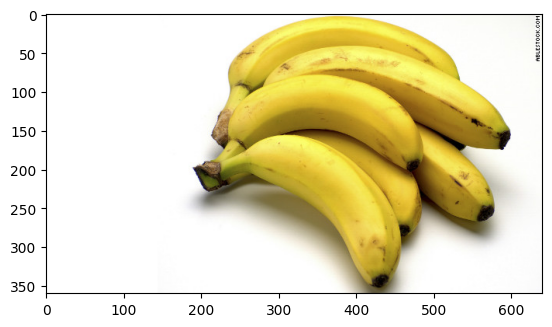

[{'score': 0.9783564209938049, 'label': 'banana'},
 {'score': 0.0016200614627450705, 'label': 'lemon'},
 {'score': 0.0012400049017742276, 'label': 'orange'},
 {'score': 0.0008887021685950458, 'label': 'strawberry'},
 {'score': 0.0006628523115068674, 'label': 'pineapple, ananas'}]

In [3]:
img = mpimg.imread("./banano.jpg")
imgplot = plt.imshow(img)
plt.show()

# Le pasamos al modelo la imagen para que la clasifique
imgClassification("./banano.jpg")

#### Segmentación de imágenes

In [4]:
import timm

Creamos un pipeline para una tarea de segmentación de imágenes.

In [5]:
# Cargamos un modelo pre-entrenado para segmentación de imágenes.
imgSegmentation = pipeline(task = "image-segmentation")

No model was supplied, defaulted to facebook/detr-resnet-50-panoptic and revision fc15262 (https://huggingface.co/facebook/detr-resnet-50-panoptic).
Using a pipeline without specifying a model name and revision in production is not recommended.
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth" to C:\Users\alexg/.cache\torch\hub\checkpoints\resnet50_a1_0-14fe96d1.pth


d:\anaconda3\envs\transferLearning\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\alexg\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's 

Le pasamos una imagen para que realice la segmentación.

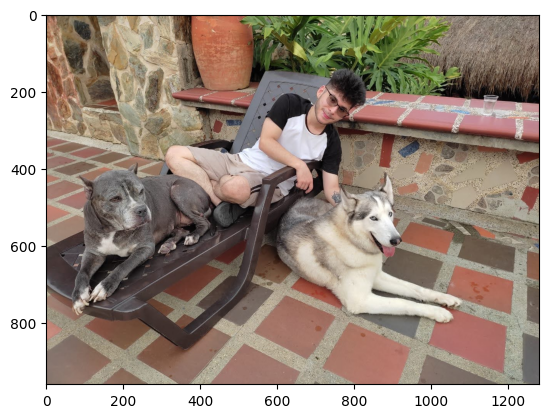

d:\anaconda3\envs\transferLearning\lib\site-packages\transformers\models\detr\image_processing_detr.py:1754: UserWarning: `label_ids_to_fuse` unset. No instance will be fused.
  warnings.warn("`label_ids_to_fuse` unset. No instance will be fused.")


[{'score': 0.990653,
  'label': 'LABEL_190',
  'mask': <PIL.Image.Image image mode=L size=1280x960>},
 {'score': 0.915969,
  'label': 'LABEL_193',
  'mask': <PIL.Image.Image image mode=L size=1280x960>},
 {'score': 0.999743,
  'label': 'dog',
  'mask': <PIL.Image.Image image mode=L size=1280x960>},
 {'score': 0.993135,
  'label': 'wall-stone',
  'mask': <PIL.Image.Image image mode=L size=1280x960>},
 {'score': 0.99918,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=1280x960>},
 {'score': 0.935975,
  'label': 'cup',
  'mask': <PIL.Image.Image image mode=L size=1280x960>},
 {'score': 0.999453,
  'label': 'dog',
  'mask': <PIL.Image.Image image mode=L size=1280x960>}]

In [7]:
img = mpimg.imread("./foto.jpg")
imgplot = plt.imshow(img)
plt.show()

# Le pasamos al modelo la imagen
imgSegmentation("./foto.jpg")

#### Generación de texto en español

Crearemos un pipeline para utilizar un modelo para generar texto en español.

In [18]:
# 
textGenerator = pipeline(
    # La tarea es generar texto
    task = "text-generation",
    # Especificamos que use el modelo Bloom 
    model = "bigscience/bloom-560m"
)

Creamos un pequeño texto inicial para pasarle al modelo y luego generamos el texto.

In [23]:
# Texto inicial
initialText = "Esta mañana me desperté y tenía mucho frío así que volví a dormir"

# Le pasamos al modelo el texto inicial y le damos un número máximo y mínimo de caracteres
textGenerator(initialText, max_new_tokens = 80)

[{'generated_text': 'Esta mañana me desperté y tenía mucho frío así que volví a dormir. No me acordaba de nada, pero me acordé de que había un montón de cosas que no había hecho en mi vida. Y me di cuenta de que no había hecho nada malo. Y me di cuenta de que no había hecho nada malo. Y me di cuenta de que no había hecho nada malo. Y me di cuenta de que no había hecho nada malo. Y me di cuenta de'}]

#### Clasificación de texto

Ahora realizaremos una clasificación de textos.

In [13]:
textClassification = pipeline(
    task = "text-classification",
    model = "pysentimiento/robertuito-sentiment-analysis"
)

In [14]:
texts = ["Estoy cansado de este hijueputa trabajo", "Amo las cerezas, ¡de verdad me encantan!"]

textClassification(texts)

[{'label': 'NEG', 'score': 0.9570094347000122},
 {'label': 'POS', 'score': 0.9706148505210876}]

### Transformers

A grandes rasgos, los Transformers son modelos especializados en detectar las formas en que los elementos de un dataset se influecian y se relacionan entre sí. Un Transformer se compone de dos parte: 
- El Encoder es el encargado de abstraer la información compleja; por ejemplo, comprender la gramática en un texto, cuáles palabras se relacionan entre ellas y almacena dicha información.
- El Decoder toma la información que el Encoder ya abstrayó y genera algo que nosotros podamos entender: texto, imágenes, etc.

Los Encoder y Decoder pueden ser entrenados por aparte. 

Algunos modelos de Encoder famosos son: BERT, AKBERT (utilizado cuando hay vocabularios muy grandes), XLM (modelo que entiende muchos lenguajes), DistilBERT, RoBERTa. Los Encoder por sí mismos son útiles para tareas como clasificación de textos, reconocimiento de entidades, extracción de preguntas y respuestas.

Algunos modelos de Decoder famosos son: GPT-Neo y GPT-J, GPT, GPT-2, GPT-3, Transformer XL, CTRL. Los Decoder son muy útiles para la generación, por ejemplo de textos o de imágenes.

Cuando juntamos Encoder y Decoder obtenemos un Modelo Secuencia-Secuencia. Por ejemplo, pasamos al modelo un texto, el Encoder se encarga de comprender los puntos más importantes en él y el Decoder genera un resumen de dicho texto. Algunos modelos famosos son BART y T5. Estos modelos son buenos en la descripción de imágenes, traducción y generación de resúmenes.

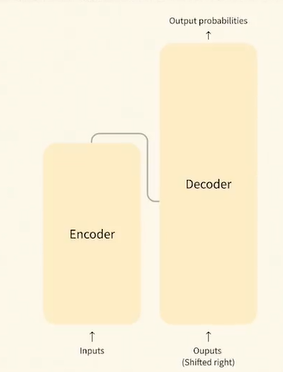

Pasos para afinar un modelo:

- Descartar la cabeza delTtransformer pre-entrenado que elegimos; es decir, le quitamos la última capa.
- Agregar nuevas cabezas para la tarea que deseamos realizar; por ejemplo, si queremos hacer una clasificación entonces agregamos una cabeza para clasificar.
- Entrenar con:
    - a. Tensor Flow o PyTorch
    - b1. Con PyTorch usar el Trainer de la biblioteca Transformer.
    - b2. Con Keras/Tensorflow se hace el entrenamiento nativo.

## Computer Vision

Vamos a afinar un modelo de visión artificial para clasificar imágenes de hojas de frijoles entre sanas y enfermas (Angular Leaf Spot o Bean Rust) utilizando el dataset [**Beans**](https://huggingface.co/datasets/beans).

Usaremos el `Trainer` de Hugging Face para entrenar nuestro modelo de clasificación de imágenes. 

Pero antes tenemos que proporcionarle información sobre nuestros datos, el procesamiento de los datos, el modelo, las métricas e información del entrenamiento.

En específico necesitamos definir cada uno de estos puntos:

    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds["train"],
    eval_dataset=prepared_ds["validation"],
    tokenizer=feature_extractor

### Descargando el dataset

Primero instalamos las bibliotecas necesarias y luego las importamos.

In [44]:
%pip install datasets transformers scikit-learn huggingface_hub

Note: you may need to restart the kernel to use updated packages.


In [2]:
from datasets import load_dataset

Ahora cargamos el dataset.

In [3]:
# Descargamos el dataset
ds = load_dataset("beans")

Found cached dataset beans (C:/Users/alexg/.cache/huggingface/datasets/beans/default/0.0.0/90c755fb6db1c0ccdad02e897a37969dbf070bed3755d4391e269ff70642d791)


  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
ds

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1034
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 133
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 128
    })
})

Por dentro nuestro dataset es un diccionario que contiene datos para training, validation y testing; features son como las columnas de un dataframe; num_rows se refiere al número de imágenes.

In [5]:
# Accedemos al index 400 de training
ds["train"][400]

{'image_file_path': 'C:\\Users\\alexg\\.cache\\huggingface\\datasets\\downloads\\extracted\\c86ee79943a4743bc3d783056014f99e651c152277c559894ebf446229aff6d3\\train\\bean_rust\\bean_rust_train.148.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>,
 'labels': 1}

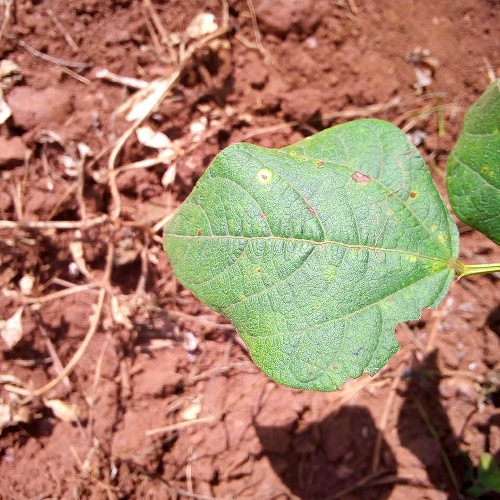

In [6]:
# Accedemos a la imagen
image = ds["train"][400]["image"]
image

Exploremos sobre las distintas etiquetas del dataset.

In [7]:
labels = ds["train"].features["labels"]
labels

ClassLabel(names=['angular_leaf_spot', 'bean_rust', 'healthy'], id=None)

Utilizando el método *int2str* podemos obtener el nombre de la etiqueta a partir de su representación numérica.

In [8]:
labels.int2str(ds["train"][400]["labels"])

'bean_rust'

### Preprocesamiento de las imágenes

Cuando se entrenan modelos ViT (Vision Transformers) es necesario aplicar transformaciones específicas a las imágenes que alimentan dichos modelos para que este entienda lo que está viendo. Para asegurarnos de aplicar las transformaciones correctas usaremos un *ViTFeatureExtractor* inicializado con una configuración que se guardó junto con el modelo pre-entrenado que usaremos: *google/vit-base-patch16-224-in21k*.
El extractor de características se encargará de preparar las características de los inputs del modelo.

In [9]:
from transformers import ViTFeatureExtractor

# Modelo que utilizaremos
repoId = "google/vit-base-patch16-224-in21k"
# Creamos el Feature Extractor y le decimos que es a partir de un modelo pre-entrenado
featureExtractor = ViTFeatureExtractor.from_pretrained(repoId)

d:\anaconda3\envs\transferLearning\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Ahora veamos la configuración de este Feature Extractor.

In [10]:
print(featureExtractor)

ViTFeatureExtractor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}



Estas operaciones se aplicarán a todas las imágenes que serán el input del modelo.

Ahora procesamos una imagen pasándola a la función *call*. De forma determinada obtenemos una matriz NumPy, pero si agregamos el argumento *return_tensors="pt"*, obtendremos tensores de PyTorch en su lugar.

In [11]:
featureExtractor(image)

{'pixel_values': [array([[[ 0.7882353 ,  0.67058825,  0.70980394, ..., -0.19215685,
         -0.12941176, -0.17647058],
        [ 0.70980394,  0.6       ,  0.6784314 , ..., -0.2862745 ,
         -0.1607843 , -0.1607843 ],
        [ 0.4901961 ,  0.38823533,  0.4666667 , ..., -0.19215685,
         -0.01960784,  0.02745104],
        ...,
        [ 0.3803922 ,  0.5294118 ,  0.48235297, ..., -0.827451  ,
         -0.81960785, -0.8039216 ],
        [ 0.09019613,  0.37254906,  0.3803922 , ..., -0.8666667 ,
         -0.84313726, -0.8509804 ],
        [-0.05098039,  0.27843142,  0.3176471 , ..., -0.85882354,
         -0.827451  , -0.8352941 ]],

       [[ 0.4901961 ,  0.34901965,  0.3803922 , ..., -0.60784316,
         -0.5372549 , -0.58431375],
        [ 0.35686278,  0.20000005,  0.3176471 , ..., -0.7254902 ,
         -0.6       , -0.5921569 ],
        [ 0.04313731, -0.09019607,  0.05882359, ..., -0.6392157 ,
         -0.47450978, -0.42745095],
        ...,
        [-0.2235294 , -0.05098039, -

In [12]:
featureExtractor(image, return_tensors = "pt")["pixel_values"].shape

torch.Size([1, 3, 224, 224])

### Procesamiento del dataset

Ya podemos leer imágenes y transformarlas en inputs adecuados para el modelo. Lo siguiente es escribir una función que junte esos dos pasos.

In [13]:
# Función para procesar un único ejemplo
def processExample(example):
    # Los inputs son el resultado de pasar la imagen que llega como argumento en el extractor; esto retorna un diccionario
    inputs = featureExtractor(example["image"], return_tensors = "pt")
    # Agregamos la Key de labels al diccionario para saber la clasificación de la imagen
    inputs["labels"] = example["labels"]
    return inputs
    

In [14]:
processExample(ds["train"][10])

{'pixel_values': tensor([[[[ 0.0275, -0.0196,  0.0196,  ...,  0.0275,  0.2157, -0.0039],
          [-0.0353,  0.0902, -0.0275,  ...,  0.2000,  0.3569,  0.1922],
          [-0.0902,  0.1216,  0.0353,  ...,  0.1686,  0.3333,  0.3098],
          ...,
          [-0.0353, -0.2784, -0.4353,  ..., -0.2863, -0.1843, -0.3882],
          [ 0.2157, -0.1765, -0.3804,  ..., -0.1294, -0.1608, -0.3647],
          [ 0.3020, -0.0275, -0.3255,  ..., -0.2471, -0.1686, -0.3333]],

         [[-0.3412, -0.3569, -0.2627,  ..., -0.3176, -0.1373, -0.3412],
          [-0.4039, -0.2549, -0.3255,  ..., -0.1373, -0.0118, -0.1843],
          [-0.4745, -0.2314, -0.2863,  ..., -0.1922, -0.0275, -0.0510],
          ...,
          [ 0.2000,  0.0431, -0.0196,  ..., -0.5373, -0.3569, -0.5216],
          [ 0.3412,  0.0745,  0.0118,  ..., -0.4039, -0.3490, -0.4980],
          [ 0.3725,  0.1922,  0.0588,  ..., -0.5216, -0.3647, -0.4745]],

         [[-0.5059, -0.5294, -0.4824,  ..., -0.4431, -0.2784, -0.4745],
          [-0

Acabamos de crear una función para aplicar las transformaciones necesarias a una única imagen; ahora aplicaremos una transformación al dataset. Las transformaciones solo se aplican a los elementos a medida que los indexamos. Antes de aplicar estas transformaciones actualizaremos la función para que pueda aceptar batches de muchas imágenes.

In [15]:
def transform(exampleBatch):
    # Hacemos que a cada imagen en el batch recibido como argumento se le aplica la extracción de características
    inputs = featureExtractor([x for x in exampleBatch["image"]], return_tensors = "pt")
    # Agregamos una Key para la categoría a la que pertenece cada imagen
    inputs["labels"] = exampleBatch["labels"]
    return inputs

Aplicamos las transformaciones a nuestro dataset.

In [16]:
# Aplicamos 
preparedDs = ds.with_transform(transform)

Ahora, cada vez que obtengamos un ejemplo del dataset se le aplicará la transformación en tiempo real.

In [17]:
preparedDs["train"][0:2]

{'pixel_values': tensor([[[[-0.5686, -0.5686, -0.5608,  ..., -0.0275,  0.1843, -0.2471],
          [-0.6078, -0.6000, -0.5765,  ..., -0.0353, -0.0196, -0.2627],
          [-0.6314, -0.6314, -0.6078,  ..., -0.2314, -0.3647, -0.2235],
          ...,
          [-0.5373, -0.5529, -0.5843,  ..., -0.0824, -0.0431, -0.0902],
          [-0.5608, -0.5765, -0.5843,  ...,  0.3098,  0.1843,  0.1294],
          [-0.5843, -0.5922, -0.6078,  ...,  0.2627,  0.1608,  0.2000]],

         [[-0.7098, -0.7098, -0.7490,  ..., -0.3725, -0.1608, -0.6000],
          [-0.7333, -0.7333, -0.7569,  ..., -0.3647, -0.3255, -0.5686],
          [-0.7490, -0.7490, -0.7725,  ..., -0.5373, -0.6549, -0.5373],
          ...,
          [-0.7725, -0.7804, -0.8196,  ..., -0.2235, -0.0353,  0.0824],
          [-0.7961, -0.8118, -0.8118,  ...,  0.1922,  0.3098,  0.3725],
          [-0.8196, -0.8196, -0.8275,  ...,  0.0824,  0.2784,  0.3961]],

         [[-0.9922, -0.9922, -1.0000,  ..., -0.5451, -0.3569, -0.7255],
          [-0

### Data Collator

Ahora definiremos una función Data Collator que se encargará de formar batches utilizando la lista de ejemplos del dataset.

In [18]:
import torch
def dataCollector(batch):
    """
    La función retorna un diccionario.
    La primera Key es pixel_values y se refiere a los valores de la imagen. Apilamos los valores de los pixeles de cada imagen en el batch recibido
    La segunda Key es label y se refiere a la categoría a la que pertenece la imagen. Guardamos en un tensor los labels de las imágenes del batch
    """
    return {
        "pixel_values": torch.stack([x["pixel_values"] for x in batch]),
        "labels" : torch.tensor([x["labels"] for x in batch])
    }

### Definir métrica

Debemos definir una métrica para poder evaluar el desempeño de nuestro modelo. En este caso utilizaremos el Accuracy Score y también definiremos una función que nos devuelva el accuracy de una predicción.

In [19]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

def computeMetrics(prediction):
    """
    Hacemos una evaluación de la predicción arrojada por el modelo versus la categoría original a la que pertenece.
    Utilizamos np.argmax para que nos devuelva la categoría que obtuvo una mayor probabilidad.
    """
    return metric.compute(predictions = np.argmax(prediction.predictions, axis = 1), references = prediction.label_ids)

C:\Users\alexg\AppData\Local\Temp\ipykernel_8064\40067557.py:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


### Configurando Trainer

El Trainer será el encargado de entrenar nuestro modelo. Lo primero es crearlo.

In [20]:
from transformers import ViTForImageClassification

# Categorías a las que pertenecen las imágenes
labels = ds["train"].features["labels"].names

# Modelo de ViT para clasificación de imágenes el cual ya está pre-entrenado
model = ViTForImageClassification.from_pretrained(
    # Modelo que utilizaremos
    repoId,
    # Indicamos que la última capa para la predicciones deberá clasificar entre 3 posibles niveles
    num_labels = len(labels),
    # Los siguientes campos son para tener etiquetas legibles en el widget del Hub    
    # Con id2label convertimos el valor de la categoría a texto
    id2label = {str(i): c for i, c in enumerate(labels)},
    # Con label2id convertimos el texto de la categoría al valor
    label2id = {c: str(i) for i, c in enumerate(labels)},
)

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Antes de continuar debemos logearnos en Hugging Face a través de un Token para poder subir el modelo a un repositorio.

In [21]:
from huggingface_hub import notebook_login
notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (manager).
Your token has been saved to C:\Users\alexg\.cache\huggingface\token
Login successful


Lo siguiente que necesita el Trainer es establecer una configuración de entrenamiento definiendo *TrainingArguments*.

In [22]:
from transformers import TrainingArguments

trainingArgs = TrainingArguments(
    # Donde guardará el modelo y su nombre
    output_dir = "./platzi-vit-model-andres-galvis",
    # Estrategia de evaluación se refiere a cuándo vamos a evaluar el performance del modelo; en este caso, en cada step
    evaluation_strategy = "steps",
    # Número de épocas
    num_train_epochs = 4,
    # Guardar el modelo en un Hub de una organización
    push_to_hub_organization = "platzi",
    # El ratio de aprendizaje
    learning_rate =  2e-4,
    # Debemos ponerlo en falso para que nos elimine la columna de imágenes
    remove_unused_columns = False,
    # Indicamos que al final sí queremos hacer un push al hub, es decir, compartir el modelo
    push_to_hub = True,
    # Subir la mejor versión del modelo
    load_best_model_at_end = True,
)

d:\anaconda3\envs\transferLearning\lib\site-packages\transformers\training_args.py:1445: FutureWarning: `--push_to_hub_organization` is deprecated and will be removed in version 5 of 🤗 Transformers. Use `--hub_model_id` instead and pass the full repo name to this argument (in this case platzi/platzi-vit-model-andres-galvis).
  warnings.warn(


Ahora que tenemos el modelo y toda la configuración necesaria para su entrenamiento creamos el Trainer.

In [23]:
from transformers import Trainer

trainer = Trainer(
    # Indicamos el modelo que usará
    model = model,
    # Los argumentos para el entrenamiento
    args = trainingArgs,
    # El Data Collector encargado de generar los batches
    data_collator = dataCollector,
    # La función para computar las métricas
    compute_metrics = computeMetrics,
    # El set de training
    train_dataset= preparedDs["train"],
    # El set de validation
    eval_dataset = preparedDs["validation"],
    # Cómo procesar los datos
    tokenizer = featureExtractor
)

d:\DATA SCIENCE\Transfer Learning\./platzi-vit-model-andres-galvis is already a clone of https://huggingface.co/platzi/platzi-vit-model-andres-galvis. Make sure you pull the latest changes with `repo.git_pull()`.


### Entrenamiento del modelo

In [29]:
# Guardamos los resultados del entrenamiento
trainResults = trainer.train()

  0%|          | 0/520 [00:00<?, ?it/s]

{'loss': 0.1343, 'learning_rate': 7.3076923076923085e-06, 'epoch': 3.85}


  0%|          | 0/17 [00:00<?, ?it/s]

{'eval_loss': 0.02271120436489582, 'eval_accuracy': 0.9849624060150376, 'eval_runtime': 32.5532, 'eval_samples_per_second': 4.086, 'eval_steps_per_second': 0.522, 'epoch': 3.85}
{'train_runtime': 3342.3263, 'train_samples_per_second': 1.237, 'train_steps_per_second': 0.156, 'train_loss': 0.12937975365381973, 'epoch': 4.0}


In [33]:
# Guardamos de formal local el modelo
trainer.save_model()

Several commits (4) will be pushed upstream.
The progress bars may be unreliable.
To https://huggingface.co/platzi/platzi-vit-model-andres-galvis
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://huggingface.co/platzi/platzi-vit-model-andres-galvis'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.

 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://huggingface.co/platzi/platzi-vit-model-andres-galvis'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the re

OSError: To https://huggingface.co/platzi/platzi-vit-model-andres-galvis
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://huggingface.co/platzi/platzi-vit-model-andres-galvis'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [32]:
# Queremos ver las métricas de training
trainer.log_metrics("train", trainResults.metrics)
# Guardamos las métricas de training
trainer.save_metrics("train", trainResults.metrics)

***** train metrics *****
  epoch                    =        4.0
  train_loss               =     0.1294
  train_runtime            = 0:55:42.32
  train_samples_per_second =      1.237
  train_steps_per_second   =      0.156


### Evaluación del modelo

In [34]:
# Evaluamos el modelo pero con el set de validación
evalMetrics = trainer.evaluate(preparedDs["validation"])
# Vemos las métricas para el set de validación
trainer.log_metrics("eval", evalMetrics)
# Guardamos los resultados
trainer.save_metrics("eval", evalMetrics)

  0%|          | 0/17 [00:00<?, ?it/s]

***** eval metrics *****
  epoch                   =        4.0
  eval_accuracy           =      0.985
  eval_loss               =     0.0227
  eval_runtime            = 0:00:38.20
  eval_samples_per_second =      3.481
  eval_steps_per_second   =      0.445


### Compartir al Hub

In [35]:
# Diccionario que tendrá información sobre el modelo
kwargs = {
    # Modelo original con el cual se entrenó este modelo
    "finetuned_from" : model.config.name_or_path,
    # Tarea que realiza el modelo
    "tasks" : "image-classification",
    # Dataset utilizado
    "dataset" : "beans",
    # Aqupi agregamos etiquetas para hacer que la API de inferencia sepa que el modelo es para clasificación de imágenes
    "tags" : ["image-classification"]
}

# Hacemos el push del modelo
trainer.push_to_hub(commit_message = "Compartiendo mi modelo", **kwargs)

Several commits (5) will be pushed upstream.
The progress bars may be unreliable.


Upload file runs/Mar27_20-02-23_aleuse/events.out.tfevents.1679969426.aleuse.8064.3:   0%|          | 1.00/363…

To https://huggingface.co/platzi/platzi-vit-model-andres-galvis
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://huggingface.co/platzi/platzi-vit-model-andres-galvis'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.

 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://huggingface.co/platzi/platzi-vit-model-andres-galvis'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Not

OSError: To https://huggingface.co/platzi/platzi-vit-model-andres-galvis
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://huggingface.co/platzi/platzi-vit-model-andres-galvis'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


## Procesamiento de Lenguaje Natural

Utilizaremos un modelo pre-entrenado para texto para luego afinarlo y utilizarlo para clasificar texto, específicamente para verificar si dos enunciados son equivalentes o no. 

Tomaremos los datos de *MRPC* el cual es un subset del dataset [*GLUE*](https://huggingface.co/datasets/glue). Dicho subset contiene dos sentencias o textos y una etiqueta para indicar si son equivalentes o no.

Como modelo utilizaremos [BERT Uncased](https://huggingface.co/bert-base-uncased) (no tiene en cuenta mayúsculas y minúsculas y es en Inglés).

### Descargando el dataset

Primero instalamos las bibliotecas necesarias.

In [37]:
%pip install datasets transformers evaluate

     ---------------------------------------- 0.0/81.4 kB ? eta -:--:--
     ------------------------------ --------- 61.4/81.4 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 81.4/81.4 kB 757.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Cargamos el dataset.

In [17]:
from datasets import load_dataset

# Cargamos el subset MRPC del dataset GLUE
ds = load_dataset("glue", "mrpc")

  0%|          | 0/3 [00:00<?, ?it/s]

Exploremos un poco el dataset.

In [18]:
ex = ds["train"][400]
ex

{'sentence1': 'U.S. Agriculture Secretary Ann Veneman , who announced Tuesdays ban , also said Washington would send a technical team to Canada to help .',
 'sentence2': "U.S. Agriculture Secretary Ann Veneman , who announced yesterday 's ban , also said Washington would send a technical team to Canada to assist in the Canadian situation .",
 'label': 1,
 'idx': 446}

Tenemos tres keys: idx es el número del ejemplo; label es la etiqueta, es decir, si los textos son equivalentes o no; sentence1 es el texto uno y sentence2 es el texto dos.

In [19]:
# Etiquetas para la clasificación de los textos en equivalentes o no equivalentes
labels = ds["train"].features["label"]

# Convertimos el valor numérico a texto
labels.int2str(1)

'equivalent'

### Tokenizar

Para preprocesar el dataset necesitamos convertir el texto en números que el modelo pueda entender; esto se hace con un Tokenizador.

Pasar de texto a números se conoce como Encoding. El Encoding es un proceso de dos pasos: la tokenización, seguida de la conversión a input ids. Lo que hacemos es traducir texto a números y a eso le llamamos input ids los cuales estarán en un formato adecuado para poder alimentar al modelo. La tokenización se encarga de dividir el texto en palabras o frases.

In [20]:
from transformers import AutoTokenizer

# Modelo pre-entrenado a utilizar
repoId = "bert-base-uncased"

# Tokenizador utilizado en el modelo de BERT
tokenizer = AutoTokenizer.from_pretrained(repoId)

Podemos alimentar al Tokenizador con una oración o una lista de oraciones por lo que podemos tokenizar directamente todas las primeras oraciones y todas las segundas oraciones de cada par.

In [21]:
# Tokenizamos la primera oración de la segunda observación del conjunto de training
tokenizedSentence1 = tokenizer(ds["train"]["sentence1"][2])
tokenizedSentence1

{'input_ids': [101, 2027, 2018, 2405, 2019, 15147, 2006, 1996, 4274, 2006, 2238, 2184, 1010, 5378, 1996, 6636, 2005, 5096, 1010, 2002, 2794, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

Necesitamos manejar los dos enunciados como un par y no por separado. El Tokenizador puede tomar un par de secuencias y procesarlas de la forma que el modelo lo necesita.

In [22]:
# Ejemplo de tokenización de dos oraciones
inputs = tokenizer("This is the first", "This is the second")
inputs

{'input_ids': [101, 2023, 2003, 1996, 2034, 102, 2023, 2003, 1996, 2117, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

¿Qué significa cada uno de los valores que nos retorna el tokenizador?
- *input_ids* es la traducción de palabras a números.
- *attention_mask* es un tensor con la misma forma que *input_ids*, pero lleno de 0 y 1: los 1 indican que se debe atender a los tokens correspondientes y los 0 indican que no se deben atender. Es decir, deben ser ignorados por el modelo.
- *token_type_ids* dice al modelo qué parte de la entrada es la primera oración y cuál es la segunda oración.

In [23]:
tokenizer.convert_ids_to_tokens(inputs["input_ids"])

['[CLS]',
 'this',
 'is',
 'the',
 'first',
 '[SEP]',
 'this',
 'is',
 'the',
 'second',
 '[SEP]']

El modelo espera que las entradas sean de la forma [CLS] oración 1 [SEP] oración 2 [SEP] cuando hay dos oraciones.

Si utilizamos otros modelos no necesariamente tendremos *token_type_ids* en las entradas tokenizadas. En general, no necesitamos preocuparnos por si hay o no *token_type_ids* en nuestras entradas tokenizadas, siempre que usemos el tokenizador correspondiente al modelo, todo estará bien ya que el tokenizador sabe qué proporcionar al modelo.

Por ejemplo, vamos a utilizar un modelo [*distilroberta-base*](https://huggingface.co/distilroberta-base) por su tamaño y efectividad. Pero no cuenta con *token_type_ids* y aún así nos regresa excelentes resultados.

In [24]:
repoId = "distilroberta-base"

tokenizer = AutoTokenizer.from_pretrained(repoId)

Ahora creemos una función para Tokenizar.

In [25]:
def tokenize(example):
    # Regresa la tokenización del example para ambas oraciones truncando el tamaño de las oraciones a un máximo
    return tokenizer(example["sentence1"], example["sentence2"], truncation = True)

Como no estamos procesando imágenes entonces podemos utilizar *map* para aplicar la Tokenización al dataset.

In [26]:
preparedDs = ds.map(tokenize, batched = True)

Map:   0%|          | 0/1725 [00:00<?, ? examples/s]

### Data Collator

Necesitamos que nuestros tensores tengan una forma rectangular; es decir, que tengan el mismo tamaño cada uno de los ejemplos. Sin embargo, los textos no necesariamente tienen el mismo tamaño. 

Para ello usamos el relleno o padding. El padding se asegura de que todas nuestras oraciones tengan la misma longitud al agregar una palabra especial llamada padding token a las oraciones con menos valores. Por ejemplo, si tenemos 10 oraciones con 10 palabras y 1 oración con 20 palabras, el relleno garantizará que todas las oraciones tengan 20 palabras.

Dejamos el argumento de *padding* del tokenizer vacío en nuestra función de tokenización por ahora. Esto se debe a que rellenar (hacer padding) todas las muestras hasta la longitud máxima del dataset no es eficiente, es mejor rellenar las muestras cuando estamos construyendo un batch, ya que entonces solo necesitamos rellenar hasta la longitud máxima en ese batch, y no la longitud máxima en todo el dataset.

Usaremos un DataCollator para esto.

In [27]:
from transformers import DataCollatorWithPadding

dataCollator = DataCollatorWithPadding(tokenizer = tokenizer)

### Definir métrica

Vamos a definir una métrica para evaluar nuestro modelo.

In [28]:
import evaluate
import numpy as np

def computeMetrics(evalPred):
    # Cargamos las métricas utilizadas para evaluar el subset MRPC
    metric = evaluate.load("glue", "mrpc")
    logits, labels = evalPred
    predictions = np.argmax(logits, axis = -1)
    return metric.compute(predictions = predictions, references = labels)

### Configurar Trainer

Primero creamos el modelo.

In [29]:
from transformers import AutoModelForSequenceClassification

# Niveles para la clasificación
labels = ds["train"].features["label"].names

# Creamos el modelo
model = AutoModelForSequenceClassification.from_pretrained(
    # Modelo pre-entrenado a utilizar
    repoId,
    # Cuántos niveles tiene la clasificación
    num_labels = len(labels),
    # Convertir el valor de la clasificación a texto
    id2label = {str(i): c for i,c in enumerate(labels)},
    # Convertir el teto al valor de la clasificación
    label2id = {c: str(i) for i, c in enumerate(labels)},
)

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'roberta.pooler.dense.bias', 'lm_head.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 

Con el modelo listo entonces procedemos a configurar el Trainer.

In [30]:
from transformers import TrainingArguments

trainingArgs = TrainingArguments(
    # Nombre del repositorio
    output_dir = "./platzi-distilroberta-base-mrpc-glue-andres-galvis",
    # Evaluaremos por cada paso
    evaluation_strategy = "steps",
    # Número de épocas
    num_train_epochs = 3,
    # Subir el repositorio a la organización de Platzi
    push_to_hub_organization = "platzi",
    # Queremos subir al Hub el repositorio
    push_to_hub = True, 
    # Subir el mejor modelo
    load_best_model_at_end = True
)

d:\anaconda3\envs\transferLearning\lib\site-packages\transformers\training_args.py:1445: FutureWarning: `--push_to_hub_organization` is deprecated and will be removed in version 5 of 🤗 Transformers. Use `--hub_model_id` instead and pass the full repo name to this argument (in this case platzi/platzi-distilroberta-base-mrpc-glue-andres-galvis).
  warnings.warn(


Finalmente, creamos el objeto Trainer.

In [31]:
from transformers import Trainer

trainer = Trainer(
    # Modelo que utilizará
    model = model,
    # La configuración del trainer
    args = trainingArgs,
    # Set de training
    train_dataset = preparedDs["train"],
    # Set de validation
    eval_dataset = preparedDs["validation"],
    # Data Collator
    data_collator = dataCollator,
    # Tokenizador
    tokenizer = tokenizer,
    # Métricas a utilizar
    compute_metrics = computeMetrics
)

d:\DATA SCIENCE\Transfer Learning\./platzi-distilroberta-base-mrpc-glue-andres-galvis is already a clone of https://huggingface.co/platzi/platzi-distilroberta-base-mrpc-glue-andres-galvis. Make sure you pull the latest changes with `repo.git_pull()`.


### Entrenamiento del modelo

In [32]:
# Guardamos los resultados del entrenamiento
trainResults = trainer.train()

d:\anaconda3\envs\transferLearning\lib\site-packages\transformers\optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/1377 [00:00<?, ?it/s]

You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'loss': 0.5219, 'learning_rate': 3.184458968772695e-05, 'epoch': 1.09}


  0%|          | 0/51 [00:00<?, ?it/s]

{'eval_loss': 0.7457081079483032, 'eval_accuracy': 0.8235294117647058, 'eval_f1': 0.8745644599303136, 'eval_runtime': 19.4491, 'eval_samples_per_second': 20.978, 'eval_steps_per_second': 2.622, 'epoch': 1.09}
{'loss': 0.3715, 'learning_rate': 1.3689179375453886e-05, 'epoch': 2.18}


  0%|          | 0/51 [00:00<?, ?it/s]

{'eval_loss': 0.5883088707923889, 'eval_accuracy': 0.8357843137254902, 'eval_f1': 0.8788426763110307, 'eval_runtime': 18.5504, 'eval_samples_per_second': 21.994, 'eval_steps_per_second': 2.749, 'epoch': 2.18}
{'train_runtime': 2218.0404, 'train_samples_per_second': 4.961, 'train_steps_per_second': 0.621, 'train_loss': 0.3848140830134861, 'epoch': 3.0}


In [33]:
# Guardamos de formal local el modelo
trainer.save_model()

Upload file runs/Mar28_08-31-09_aleuse/events.out.tfevents.1680010273.aleuse.8008.2: 100%|##########| 5.49k/5.…

To https://huggingface.co/platzi/platzi-distilroberta-base-mrpc-glue-andres-galvis
   d205d4c..97887f8  main -> main

   d205d4c..97887f8  main -> main

To https://huggingface.co/platzi/platzi-distilroberta-base-mrpc-glue-andres-galvis
   97887f8..c09ac66  main -> main

   97887f8..c09ac66  main -> main



In [34]:
# Queremos ver las métricas de training
trainer.log_metrics("train", trainResults.metrics)
# Guardamos las métricas de training
trainer.save_metrics("train", trainResults.metrics)

***** train metrics *****
  epoch                    =        3.0
  train_loss               =     0.3848
  train_runtime            = 0:36:58.04
  train_samples_per_second =      4.961
  train_steps_per_second   =      0.621


### Evaluación del modelo

In [35]:
# Evaluamos el modelo pero con el set de validación
evalMetrics = trainer.evaluate(preparedDs["validation"])
# Vemos las métricas para el set de validación
trainer.log_metrics("eval", evalMetrics)
# Guardamos los resultados
trainer.save_metrics("eval", evalMetrics)

  0%|          | 0/51 [00:00<?, ?it/s]

***** eval metrics *****
  epoch                   =        3.0
  eval_accuracy           =     0.8358
  eval_f1                 =     0.8788
  eval_loss               =     0.5883
  eval_runtime            = 0:00:22.42
  eval_samples_per_second =     18.194
  eval_steps_per_second   =      2.274


### Compartir al Hub

In [36]:
# Diccionario que tendrá información sobre el modelo
kwargs = {
    # Modelo original con el cual se entrenó este modelo
    "finetuned_from" : model.config.name_or_path,
    # Tarea que realiza el modelo
    "tasks" : "text-classification",
    # Dataset utilizado
    "dataset" : ["glue", "mrpc"],
    # Aquí agregamos etiquetas para hacer que la API de inferencia sepa que el modelo es para clasificación de texto
    "tags" : ["text-classification"]
}

# Hacemos el push del modelo
trainer.push_to_hub(commit_message = "Compartiendo mi modelo", **kwargs)

Upload file runs/Mar28_08-31-09_aleuse/events.out.tfevents.1680012540.aleuse.8008.4: 100%|##########| 409/409 …

To https://huggingface.co/platzi/platzi-distilroberta-base-mrpc-glue-andres-galvis
   c09ac66..61c21bf  main -> main

   c09ac66..61c21bf  main -> main

To https://huggingface.co/platzi/platzi-distilroberta-base-mrpc-glue-andres-galvis
   61c21bf..02ed49a  main -> main

   61c21bf..02ed49a  main -> main



'https://huggingface.co/platzi/platzi-distilroberta-base-mrpc-glue-andres-galvis/commit/61c21bf1156f3ccd6b30019c639a9deda5c3d326'